Load Packages

In [43]:
# Import necessary libraries
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
import nltk

In [44]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
#for confusion matrix
import seaborn
from sklearn.metrics import confusion_matrix
import keras

Load the dataset

In [45]:
# Load and preview the dataset
tweets = pd.read_csv('data.csv')
print(f"The dataset contains {tweets.shape[0]} rows and {tweets.shape[1]} columns.")
print(tweets.head())

The dataset contains 209929 rows and 36 columns.
                    id      conversation_id  \
0  1319174447442448384  1319153697406906369   
1  1319174381503852544  1319174381503852544   
2  1319174114779643905  1319174114779643905   
3  1319174091232833536  1319172728851591174   
4  1319174029488476160  1319174029488476160   

                                created_at        date      time  timezone  \
0  2020-10-22 12:41:12 India Standard Time  2020-10-22  12:41:12       530   
1  2020-10-22 12:40:56 India Standard Time  2020-10-22  12:40:56       530   
2  2020-10-22 12:39:52 India Standard Time  2020-10-22  12:39:52       530   
3  2020-10-22 12:39:47 India Standard Time  2020-10-22  12:39:47       530   
4  2020-10-22 12:39:32 India Standard Time  2020-10-22  12:39:32       530   

              user_id        username           name place  ... geo source  \
0           270371054  to_fly_to_live    Flynn Rider   NaN  ... NaN    NaN   
1  864189073858084864  utkarshsinha07  Utka

In [46]:
print(f'The Dataset shape is:',tweets.shape)

The Dataset shape is: (209929, 36)


In [47]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209929 entries, 0 to 209928
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               209929 non-null  int64  
 1   conversation_id  209929 non-null  int64  
 2   created_at       209929 non-null  object 
 3   date             209929 non-null  object 
 4   time             209929 non-null  object 
 5   timezone         209929 non-null  int64  
 6   user_id          209929 non-null  int64  
 7   username         209929 non-null  object 
 8   name             209915 non-null  object 
 9   place            75 non-null      object 
 10  tweet            209929 non-null  object 
 11  language         209929 non-null  object 
 12  mentions         209929 non-null  object 
 13  urls             209929 non-null  object 
 14  photos           209929 non-null  object 
 15  replies_count    209929 non-null  int64  
 16  retweets_count   209929 non-null  int6

In [48]:
tweets.describe()

,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,retweet,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,2.099290e+05,2.099290e+05,209929.0,2.099290e+05,209929.000000,209929.000000,209929.000000,0.0,209929.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.292864e+18,1.292117e+18,530.0,4.026792e+17,1.181371,3.792382,14.160226,NaN,0.107736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.839034e+16,2.517739e+16,0.0,5.309137e+17,20.060115,137.894592,581.244922,NaN,0.310048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.227374e+18,1.618888e+09,530.0,2.200000e+01,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.283624e+18,1.283446e+18,530.0,2.066107e+08,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.295913e+18,1.295745e+18,530.0,2.186781e+09,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.306552e+18,1.306436e+18,530.0,9.791968e+17,1.000000,0.000000,2.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.319174e+18,1.319174e+18,530.0,1.319116e+18,3041.000000,42989.000000,206162.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
print(tweets.columns)


Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


Missing DATA

In [50]:
#Lets find out the mising data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [51]:
missing_data(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
Total,0,0,0,0,0,0,0,0,14,209854,...,209929,209929,209929,209929,209929,0,209929,209929,209929,209929
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006669,99.964274,...,100.0,100.0,100.0,100.0,100.0,0.0,100.0,100.0,100.0,100.0
Types,int64,int64,object,object,object,int64,int64,object,object,object,...,float64,float64,float64,float64,float64,object,float64,float64,float64,float64


Unique values

In [52]:
#Unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']

    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [53]:
unique_values(tweets)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
Total,209929,209929,209929,209929,209929,209929,209929,209929,209915,75,...,0,0,0,0,0,209929,0,0,0,0
Uniques,209929,197113,206826,249,77104,1,140792,140793,131456,55,...,0,0,0,0,0,41356,0,0,0,0


Most Frequent Values

In [54]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

**Visualize the Data Distribution**

In [55]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4),)
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='RdBu')
    else:
        g = sns.countplot(df[feature], palette='RdBu')
    g.set_title("Number and percentage of {}\n".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=10)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2. ,height, ' {:1.2f}% '.format(100*height/total), ha="center")
    plt.show()

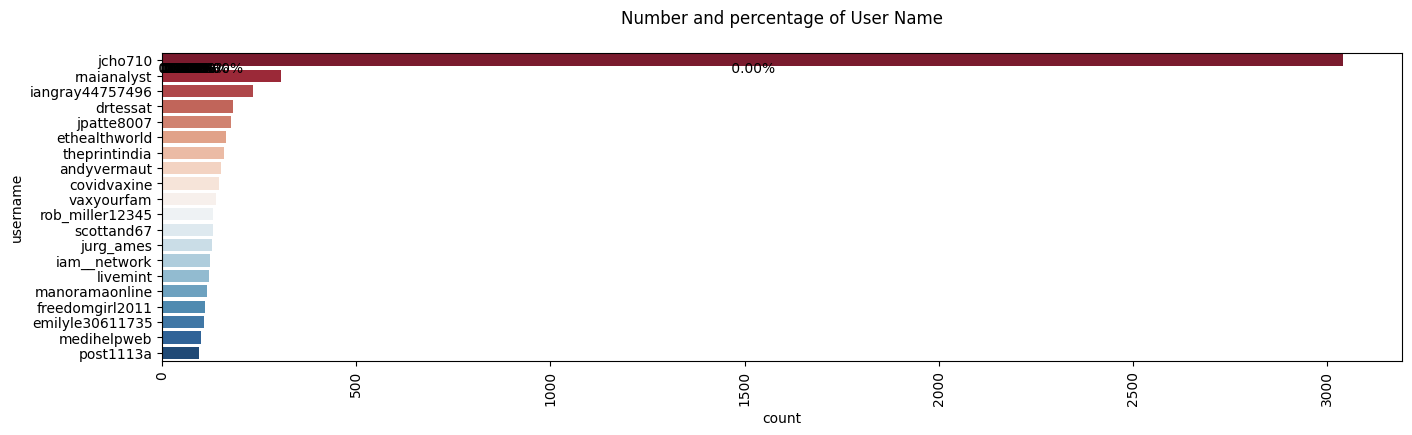

In [56]:
# User Name
plot_count('username' , "User Name" , tweets , 4)

In [57]:
# Basic data cleaning
tweets.dropna(subset=['tweet'], inplace=True)  # Remove rows with missing 'tweet' values
tweets['tweet'] = tweets['tweet'].str.lower()  # Convert text to lowercase
tweets['tweet'] = tweets['tweet'].str.replace(r'http\S+', '', regex=True)  # Remove URLs
tweets['tweet'] = tweets['tweet'].str.replace(r'[^\w\s]', '', regex=True)  # Remove punctuation



Hashtag Analysis

In [58]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature,color='blue')
        else:
            sns.distplot(df[feature],kde=True, hist=False, bins=120, label=feature,color='blue')
    plt.xlabel('')
    plt.legend()
    plt.show()

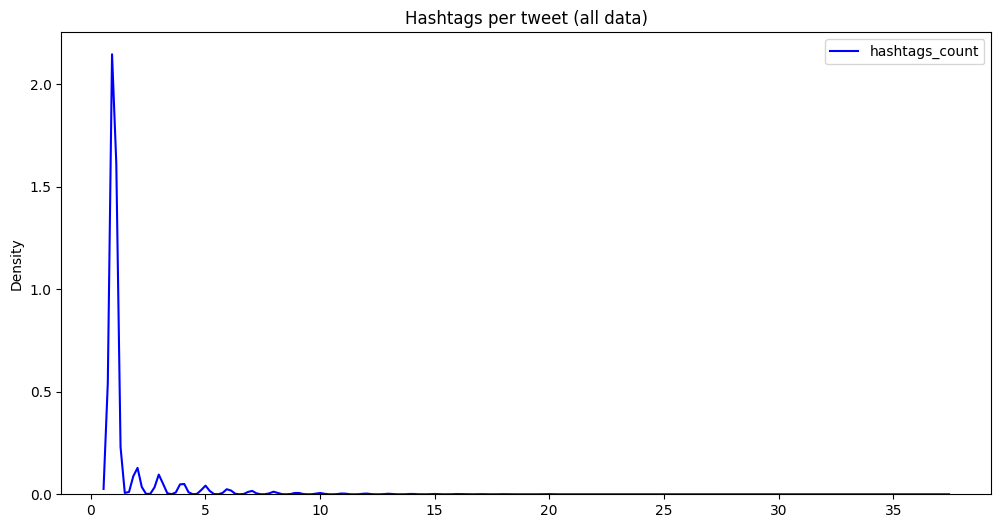

In [59]:
tweets['hashtags'] = tweets['hashtags'].replace(np.nan, "['None']", regex=True)
tweets['hashtags'] = tweets['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets['hashtags_count'] = tweets['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets)

Pre Processing our dataset

In [62]:
'''
The next steps about data cleaning will be:
- Remove URLs from the tweets
- Tokenize text
- Remove emails
- Remove new lines characters
- Remove distracting single quotes
- Remove all punctuation signs
- Lowercase all text
- Detokenize text
- Convert list of texts to Numpy array
'''
def depure_data(data):

    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)

    # Remove dpunctuation signs
    data = re.sub("#", " ", data)



    return data

In [66]:
import re  # Import the regular expression module

# Assuming depure_data is a function defined elsewhere
temp = []
# Splitting pd.Series to list
data_to_list = tweets["tweet"].values.tolist()

for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))

# Showing first 30 processed items
print(list(temp[:30]))


['ani isnt it the best poll promise ever free covid vaccine if you vote for bjp but wait if they dont vote for you will you let em die does that mean centre will provide vaccines only to states ruled by bjp shameless leeches thats the least i got to describe the whole party', 'now states shall have wait for thier vidhan sabha election to get covid vaccine biharpolls', 'जस मदर न टरन तक नह चलई और तम पतन व छट छट बचच क सथ सकड कम पलयन करन क मजबर हए आज व तमहर छल पर दवई लगन क वद कर रह ह यद रखन बहरय biharpolls covidvaccine ', 'misseemonis they said vaccine for all but not when free covid vaccine is the new 15 lakhs rs in every account kind of jumla', 'bjp really presenting free covid vaccine as a state manifesto to win the bihar elections as if its a diwali sale offer and they arent the ruling party at the centre in charge of providing the vaccine to the entire country at the same cost party of deranged analphabetics', 'another dose of daily miserablism from planet grauniad subs if youre pinni

In [68]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))


data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['ani', 'isnt', 'it', 'the', 'best', 'poll', 'promise', 'ever', 'free', 'covid', 'vaccine', 'if', 'you', 'vote', 'for', 'bjp', 'but', 'wait', 'if', 'they', 'dont', 'vote', 'for', 'you', 'will', 'you', 'let', 'em', 'die', 'does', 'that', 'mean', 'centre', 'will', 'provide', 'vaccines', 'only', 'to', 'states', 'ruled', 'by', 'bjp', 'shameless', 'leeches', 'thats', 'the', 'least', 'got', 'to', 'describe', 'the', 'whole', 'party'], ['now', 'states', 'shall', 'have', 'wait', 'for', 'thier', 'vidhan', 'sabha', 'election', 'to', 'get', 'covid', 'vaccine', 'biharpolls'], ['जस', 'मदर', 'टरन', 'तक', 'नह', 'चलई', 'और', 'तम', 'पतन', 'छट', 'छट', 'बचच', 'सथ', 'सकड', 'कम', 'पलयन', 'करन', 'मजबर', 'हए', 'आज', 'तमहर', 'छल', 'पर', 'दवई', 'लगन', 'वद', 'कर', 'रह', 'यद', 'रखन', 'बहरय', 'biharpolls', 'covidvaccine'], ['misseemonis', 'they', 'said', 'vaccine', 'for', 'all', 'but', 'not', 'when', 'free', 'covid', 'vaccine', 'is', 'the', 'new', 'lakhs', 'rs', 'in', 'every', 'account', 'kind', 'of', 'jumla'], [

In [69]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['ani isnt it the best poll promise ever free covid vaccine if you vote for bjp but wait if they dont vote for you will you let em die does that mean centre will provide vaccines only to states ruled by bjp shameless leeches thats the least got to describe the whole party', 'now states shall have wait for thier vidhan sabha election to get covid vaccine biharpolls', 'जस मदर टरन तक नह चलई और तम पतन छट छट बचच सथ सकड कम पलयन करन मजबर हए आज तमहर छल पर दवई लगन वद कर रह यद रखन बहरय biharpolls covidvaccine', 'misseemonis they said vaccine for all but not when free covid vaccine is the new lakhs rs in every account kind of jumla', 'bjp really presenting free covid vaccine as state manifesto to win the bihar elections as if its diwali sale offer and they arent the ruling party at the centre in charge of providing the vaccine to the entire country at the same cost party of deranged analphabetics']


In [70]:
data = np.array(data)
#Create a sentiment column
tweets["sentiment"] = np.nan

In [71]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
tweets['sentiment'] = tweets['tweet'].apply(lambda x: find_sentiment(x))
tweets.head(25)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,hashtags_count,sentiment
0,1319174447442448384,1319153697406906369,2020-10-22 12:41:12 India Standard Time,2020-10-22,12:41:12,530,270371054,to_fly_to_live,Flynn Rider,NaN,...,NaN,NaN,NaN,"{'user_id': '355989081', 'username': 'ANI'}",NaN,NaN,NaN,NaN,1,Negative
1,1319174381503852544,1319174381503852544,2020-10-22 12:40:56 India Standard Time,2020-10-22,12:40:56,530,864189073858084864,utkarshsinha07,Utkarsh Sinha,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,1,Neutral
2,1319174114779643905,1319174114779643905,2020-10-22 12:39:52 India Standard Time,2020-10-22,12:39:52,530,116114711,batolebazi,BATOLEBAZI,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,2,Neutral
3,1319174091232833536,1319172728851591174,2020-10-22 12:39:47 India Standard Time,2020-10-22,12:39:47,530,1249338116,bak_sahil,sahil,NaN,...,NaN,NaN,NaN,"{'user_id': '1105377223', 'username': 'MisseeM...",NaN,NaN,NaN,NaN,1,Negative
4,1319174029488476160,1319174029488476160,2020-10-22 12:39:32 India Standard Time,2020-10-22,12:39:32,530,804225890062319617,ivibhatweedy,𝐯𝐢𝐛𝐬 | 🐺,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,1,Positive
5,1319173971636609025,1319173971636609025,2020-10-22 12:39:18 India Standard Time,2020-10-22,12:39:18,530,712681200,paulwatson72,Paul Watson,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,1,Positive
6,1319173894742241280,1319173894742241280,2020-10-22 12:39:00 India Standard Time,2020-10-22,12:39:00,530,357389251,adarshshastri,Adarsh Shastri,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,1,Negative
7,1319173854153961472,1319173854153961472,2020-10-22 12:38:50 India Standard Time,2020-10-22,12:38:50,530,2490973032,baskaranbharath,Bharath Baskaran,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,3,Positive
8,1319173846591700996,1319173846591700996,2020-10-22 12:38:48 India Standard Time,2020-10-22,12:38:48,530,3892092434,skphotography68,Sumit Kumar,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,3,Neutral
9,1319173820255592448,1319173820255592448,2020-10-22 12:38:42 India Standard Time,2020-10-22,12:38:42,530,711694309,aamaadmiparty,AAP,NaN,...,NaN,NaN,NaN,"{'user_id': None, 'username': None}",NaN,NaN,NaN,NaN,1,Negative


In [73]:
pos = tweets['sentiment'].value_counts()
print(pos)

sentiment
Positive    83068
Neutral     64057
Negative    62804
Name: count, dtype: int64


In [74]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)
    print(percent,"\n")
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}\n")
    plt.tight_layout()
    plt.show()

sentiment
Positive    0.395696
Neutral     0.305136
Negative    0.299168
Name: count, dtype: float64 



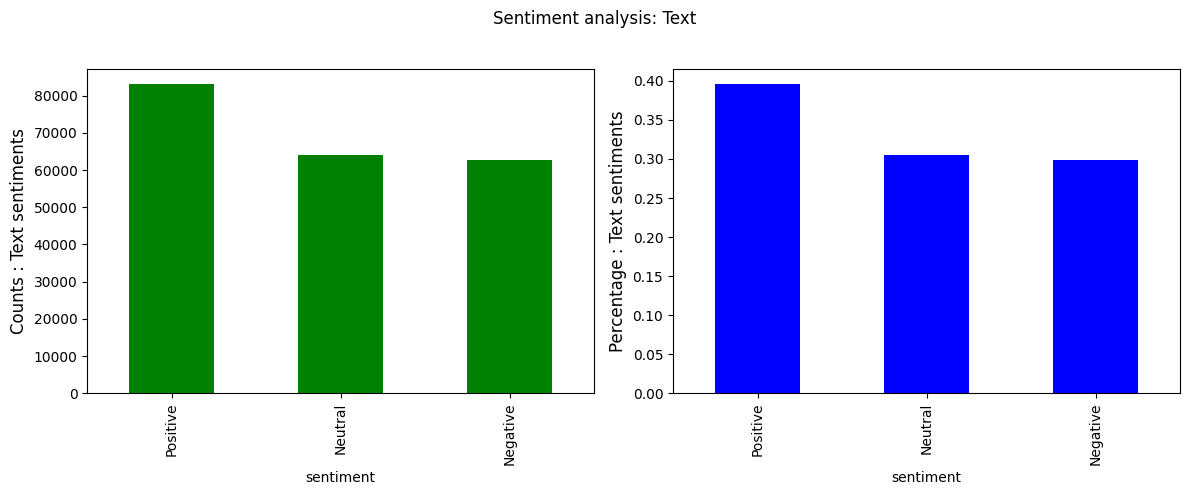

In [75]:
plot_sentiment(tweets, 'sentiment', 'Text')

In [76]:
import numpy as np
import tensorflow as tf  # Importing TensorFlow to use tf.keras.utils

# Assuming 'tweets' is a DataFrame that contains the 'sentiment' column
labels = np.array(tweets["sentiment"])
y = []

# Mapping sentiment labels to integers
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    elif labels[i] == 'Negative':
        y.append(1)
    elif labels[i] == "Positive":
        y.append(2)

# Convert list to numpy array
y = np.array(y)

# One-hot encoding the labels without the dtype argument
labels = tf.keras.utils.to_categorical(y, 3)

# Clean up by deleting the temporary variable 'y'
del y


**Data sequencing and splitting**

In [77]:
# Use tensorflow.keras instead of keras directly
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.text import Tokenizer  # Corrected import
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint


In [78]:
#Conver the word to vec
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweetspad = pad_sequences(sequences, maxlen=max_len)
print(tweetspad)

[[   0    0    0 ...    3  522 1028]
 [   0    0    0 ...   24    2    1]
 [   0    0    0 ... 3126 2308   23]
 ...
 [   0    0    0 ...    9    3  404]
 [   0    0    0 ...    1    7 2153]
 [   0    0    0 ...    2    1 1955]]


In [79]:
print(labels)

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [80]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweetspad,labels, random_state=0)
print (f"Our data split form:\n")
print(f"X_train: ",len(X_train))
print(f"X_test: ",len(X_test))
print(f"y_train: ",len(y_train))
print(f"y_test: ", len(y_test))

Our data split form:

X_train:  157446
X_test:  52483
y_train:  157446
y_test:  52483


Single LSTM

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the model
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))  # Adjust 'max_words' to your vocabulary size
model1.add(layers.LSTM(15, dropout=0.5))
model1.add(layers.Dense(3, activation='softmax'))  # Output layer for 3 classes

# Compile the model
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Implement ModelCheckpoint to save the best model during training
checkpoint1 = ModelCheckpoint(
    "best_model1.keras",  # Updated file extension to `.keras`
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    save_freq='epoch'  # Save model at the end of each epoch
)

# Train the model
history1 = model1.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[checkpoint1]
)

Epoch 1/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.6329 - loss: 0.7756
Epoch 1: val_accuracy improved from -inf to 0.84363, saving model to best_model1.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 421s 85ms/step - accuracy: 0.6329 - loss: 0.7756 - val_accuracy: 0.8436 - val_loss: 0.4169
Epoch 2/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.8517 - loss: 0.4000
Epoch 2: val_accuracy improved from 0.84363 to 0.87903, saving model to best_model1.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 445s 86ms/step - accuracy: 0.8517 - loss: 0.4000 - val_accuracy: 0.8790 - val_loss: 0.3489
Epoch 3/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.8778 - loss: 0.3509
Epoch 3: val_accuracy improved from 0.87903 to 0.88920, saving model to best_model1.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 425s 86ms/step - accuracy: 0.8778 - loss: 0.3509 - val_accuracy: 0.8892 - val_loss: 0.3337
Epoch 4/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8863 - loss: 0.3355
Epoch 4: va

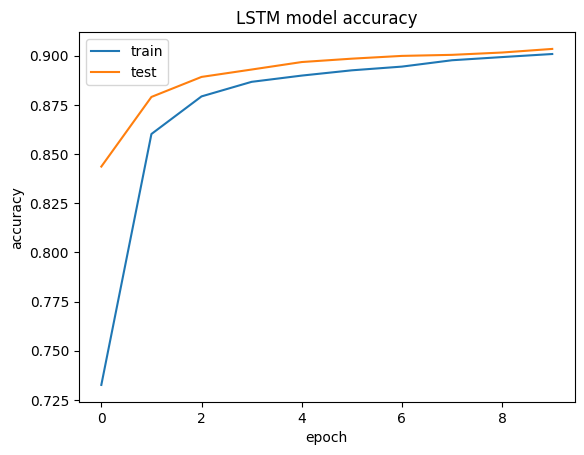

In [82]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

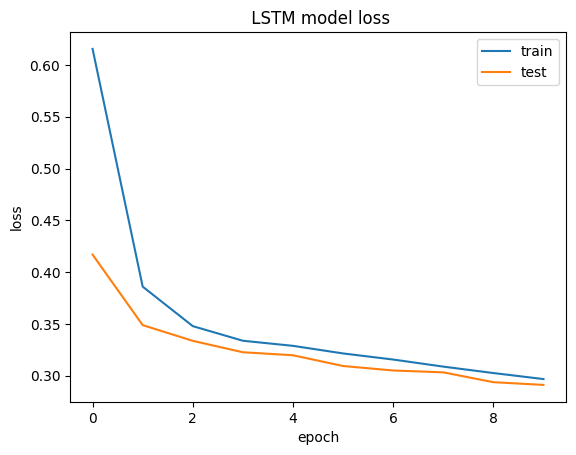

In [83]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title(' LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [84]:
best_model = keras.models.load_model("./best_model1.keras")

In [85]:
lstmpredict = model1.predict(X_test)
print(lstmpredict)

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step
[[0.00152041 0.9831307  0.01534882]
 [0.00479471 0.06041909 0.9347862 ]
 [0.00146044 0.01068524 0.98785436]
 ...
 [0.00178348 0.9945503  0.00366624]
 [0.00148544 0.9926312  0.00588337]
 [0.00952532 0.06155447 0.92892015]]


In [86]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1641/1641 - 29s - 18ms/step - accuracy: 0.9034 - loss: 0.2911
Model accuracy:  0.9034354090690613


In [87]:
test_loss, test_acc = best_model.evaluate(lstmpredict, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1641/1641 - 2s - 2ms/step - accuracy: 0.3059 - loss: 1.2311
Model accuracy:  0.3059466779232025


In [88]:
# Plot the classification_report
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(lstmpredict, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     16057
           1       0.86      0.87      0.86     15574
           2       0.92      0.88      0.90     20852

    accuracy                           0.90     52483
   macro avg       0.90      0.91      0.90     52483
weighted avg       0.90      0.90      0.90     52483



Bidirectional LSTM

In [89]:
from tensorflow.keras.callbacks import ModelCheckpoint



# Define the model

model = Sequential()

model.add(layers.Embedding(max_words, 40, input_length=max_len))

model.add(layers.Bidirectional(layers.LSTM(20, dropout=0.6)))

model.add(layers.Dense(3, activation='softmax'))



# Compile the model

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])



# Save the model using ModelCheckpoint

checkpoint2 = ModelCheckpoint(

    "best_model2.keras",

    monitor='val_accuracy',

    verbose=1,

    save_best_only=True,

    mode='auto',  # Saves the model only when validation accuracy improves

    save_weights_only=False

)



# Train the model

history = model.fit(

    X_train,

    y_train,

    epochs=10,

    validation_data=(X_test, y_test),

    callbacks=[checkpoint2]

)



Epoch 1/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.6327 - loss: 0.7690
Epoch 1: val_accuracy improved from -inf to 0.85384, saving model to best_model2.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 798s 161ms/step - accuracy: 0.6327 - loss: 0.7690 - val_accuracy: 0.8538 - val_loss: 0.3950
Epoch 2/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.8606 - loss: 0.3872
Epoch 2: val_accuracy improved from 0.85384 to 0.88467, saving model to best_model2.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 754s 151ms/step - accuracy: 0.8606 - loss: 0.3872 - val_accuracy: 0.8847 - val_loss: 0.3364
Epoch 3/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.8836 - loss: 0.3370
Epoch 3: val_accuracy improved from 0.88467 to 0.89322, saving model to best_model2.keras
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 816s 154ms/step - accuracy: 0.8836 - loss: 0.3370 - val_accuracy: 0.8932 - val_loss: 0.3182
Epoch 4/10
4921/4921 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.8931 - loss: 0.3162
Epoc

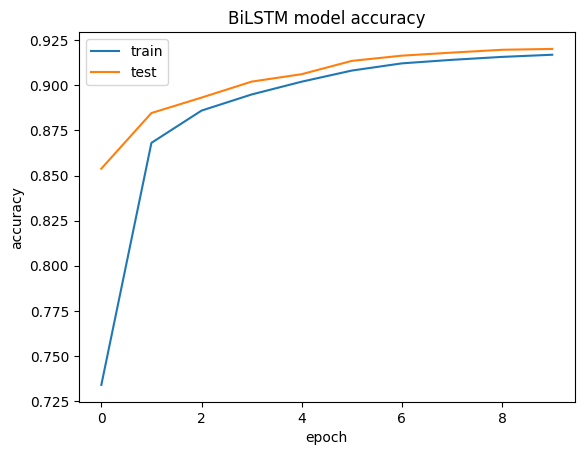

In [90]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BiLSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

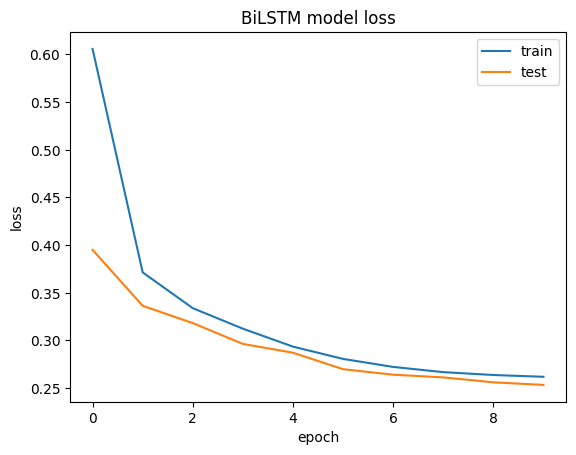

In [91]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BiLSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [92]:
best_model = keras.models.load_model("./best_model2.keras")

In [93]:
predictions = best_model.predict(X_test)
print(predictions)


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 50s 30ms/step
[[8.3157187e-04 9.8362446e-01 1.5543805e-02]
 [2.8923070e-03 9.3942145e-03 9.8771352e-01]
 [1.5238135e-03 1.0433570e-02 9.8804253e-01]
 ...
 [1.1873792e-03 9.9522972e-01 3.5829463e-03]
 [1.4729889e-03 9.9596965e-01 2.5574579e-03]
 [8.1146136e-03 8.9226201e-02 9.0265924e-01]]


In [94]:
test_loss, test_acc = best_model.evaluate(predictions, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1641/1641 - 6s - 4ms/step - accuracy: 0.3059 - loss: 1.1865
Model accuracy:  0.3059466779232025


In [95]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

1641/1641 - 42s - 26ms/step - accuracy: 0.9202 - loss: 0.2534
Model accuracy:  0.9202218055725098


In [96]:
# Plot the classification_report
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(predictions, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     16057
           1       0.90      0.88      0.89     15574
           2       0.93      0.91      0.92     20852

    accuracy                           0.92     52483
   macro avg       0.92      0.92      0.92     52483
weighted avg       0.92      0.92      0.92     52483



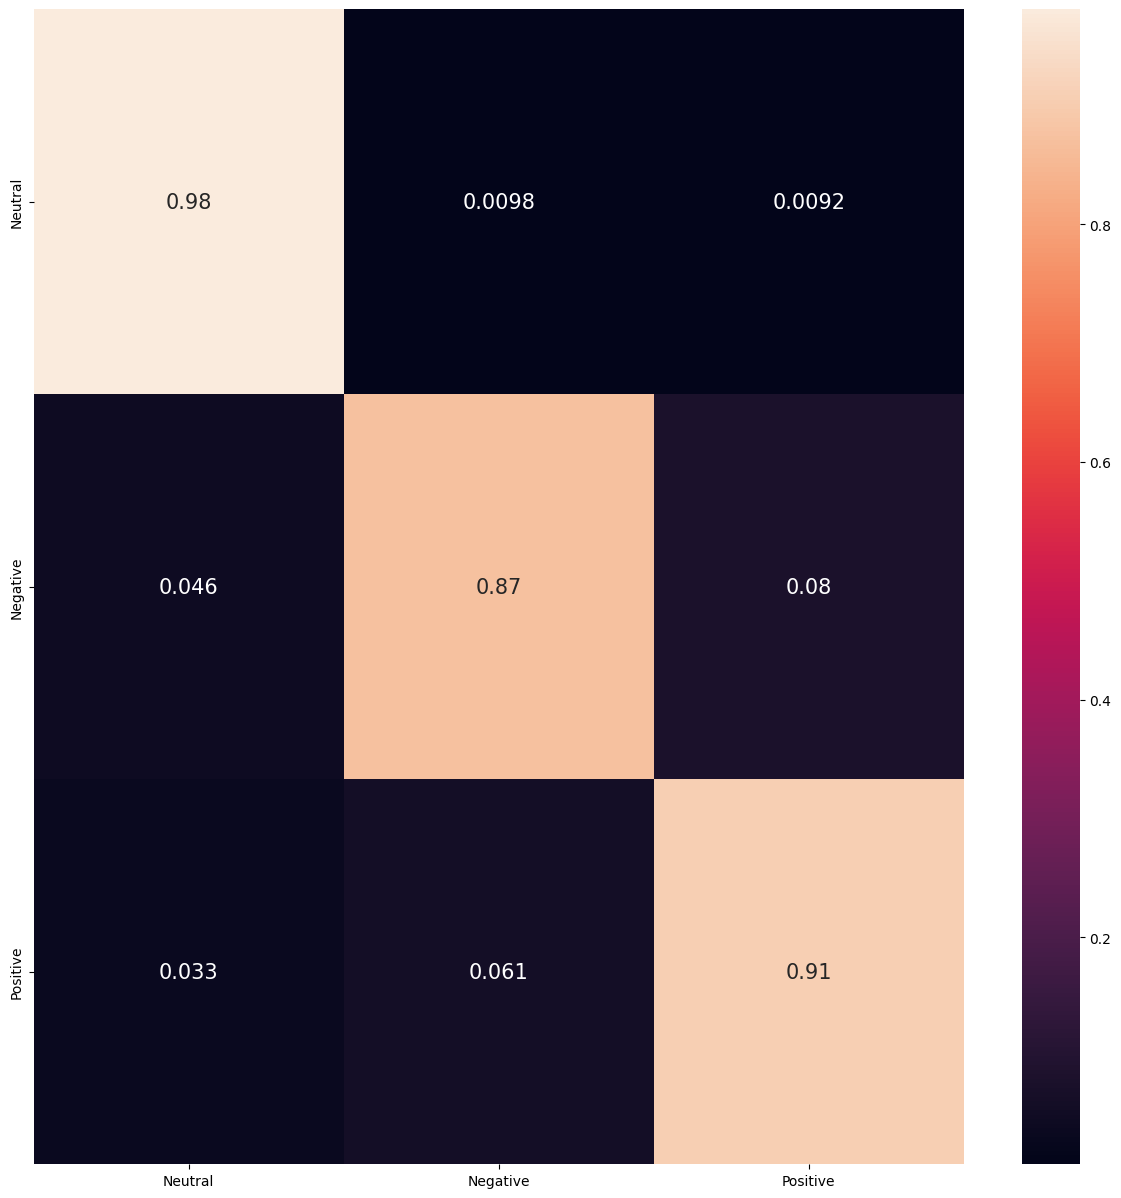

In [97]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and predictions are already defined
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

# Creating a DataFrame for the confusion matrix
conf_matrix = pd.DataFrame(matrix, index=['Neutral', 'Negative', 'Positive'], columns=['Neutral', 'Negative', 'Positive'])

# Normalizing the confusion matrix
conf_matrix = conf_matrix.values.astype('float')  # Convert DataFrame to NumPy array for easier manipulation
conf_matrix /= conf_matrix.sum(axis=1)[:, np.newaxis]  # Normalize along the rows

# Convert back to DataFrame for visualization
conf_matrix = pd.DataFrame(conf_matrix, index=['Neutral', 'Negative', 'Positive'], columns=['Neutral', 'Negative', 'Positive'])

# Plotting the heatmap
plt.figure(figsize=(15, 15))
seaborn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
plt.show()


In [98]:
sentiment = ['Neutral','Negative','Positive']

In [99]:
sequence = tokenizer.texts_to_sequences(['the trump administration failed to deliver on vaccine promises shocker covidiots coronavirus covidvaccine'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


'Negative'

In [100]:
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


'Positive'

In [101]:
sequence = tokenizer.texts_to_sequences(['Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them.'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'Neutral'